This is for the Davis Club dataset

In [171]:
# Import required libraries
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
# Reset and define figure size for plots
plt.rcParams.update(plt.rcParamsDefault)

Read in the Davis Southern Women group data from the given Networkx function. Extract the $women$ nodes and the $event$ nodes.

In [172]:
# From https://networkx.org/documentation/networkx-1.11/examples/algorithms/davis_club.html?highlight=davis%20club
G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

Naively draw initial graph

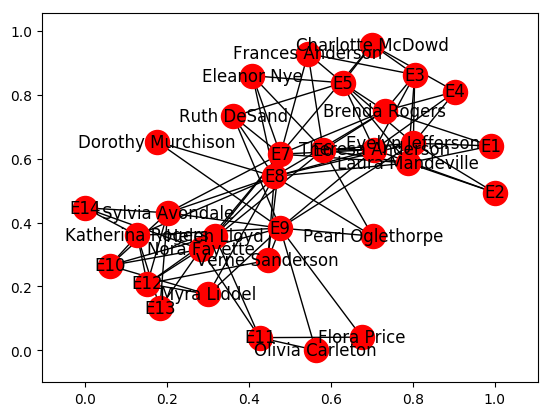

In [173]:
nx.draw_networkx(G)

Confirm graph is connected: True

In [174]:
nx.is_connected(G)

True

Confirm graph is bipartite: True

In [175]:
bi.is_bipartite(G)

True

Confirm there are 18 $women$ nodes and 14 $events$ nodes. Expected values.

In [176]:
(len(women), len(events))

(18, 14)

## Projected Graph

Generate projected graph based on the women nodes to determine the connections

- Nodes that share a common neighbor

This is connecting the people based on a shared node, which would be a event node, so Evelyn Jefferson is connected to every other person through a common event node.



In [177]:
W = bi.projected_graph(G, women)

women_deg_dict = {}
for w in women:
        women_deg_dict[w] = W.degree(w)
{k: v for k, v in sorted(women_deg_dict.items(), key=lambda item: item[1], reverse=True)}

{'Evelyn Jefferson': 17,
 'Theresa Anderson': 17,
 'Ruth DeSand': 17,
 'Verne Sanderson': 17,
 'Sylvia Avondale': 17,
 'Nora Fayette': 17,
 'Helen Lloyd': 17,
 'Pearl Oglethorpe': 16,
 'Myra Liddel': 16,
 'Katherina Rogers': 16,
 'Dorothy Murchison': 16,
 'Laura Mandeville': 15,
 'Brenda Rogers': 15,
 'Frances Anderson': 15,
 'Eleanor Nye': 15,
 'Olivia Carleton': 12,
 'Flora Price': 12,
 'Charlotte McDowd': 11}

Naively draw the projected graph of $women$ nodes.

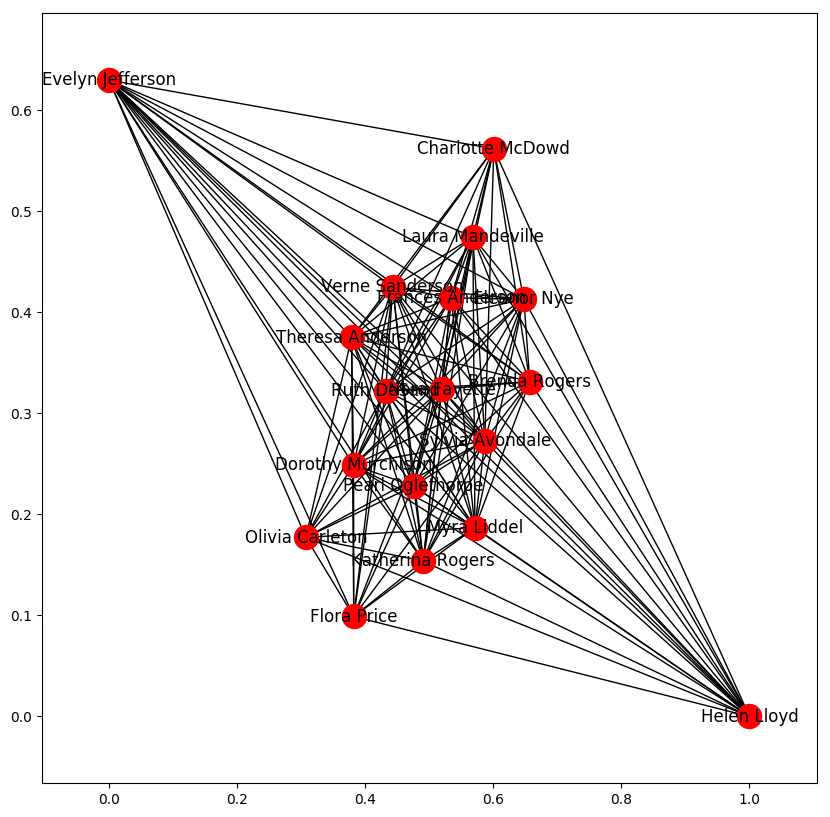

In [178]:
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw_networkx(W)

Weighted Projected Graph is determining an affilitation network.

## Weighted Projected Graph

In [179]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women, ratio=False)

women_wgt_dict = {}
for w in women:
        women_wgt_dict[w] = (W.degree(w,weight='weight'))
{k: v for k, v in sorted(women_wgt_dict.items(), key=lambda item: item[1], reverse=True)}

{'Theresa Anderson': 57,
 'Evelyn Jefferson': 50,
 'Brenda Rogers': 46,
 'Sylvia Avondale': 46,
 'Laura Mandeville': 45,
 'Nora Fayette': 43,
 'Ruth DeSand': 40,
 'Verne Sanderson': 38,
 'Katherina Rogers': 37,
 'Eleanor Nye': 36,
 'Helen Lloyd': 34,
 'Myra Liddel': 33,
 'Frances Anderson': 32,
 'Pearl Oglethorpe': 31,
 'Charlotte McDowd': 24,
 'Dorothy Murchison': 24,
 'Olivia Carleton': 14,
 'Flora Price': 14}

Draw the graph

In [180]:
weights=[math.log(edata['weight']) for f,t,edata in W.edges(data=True)]

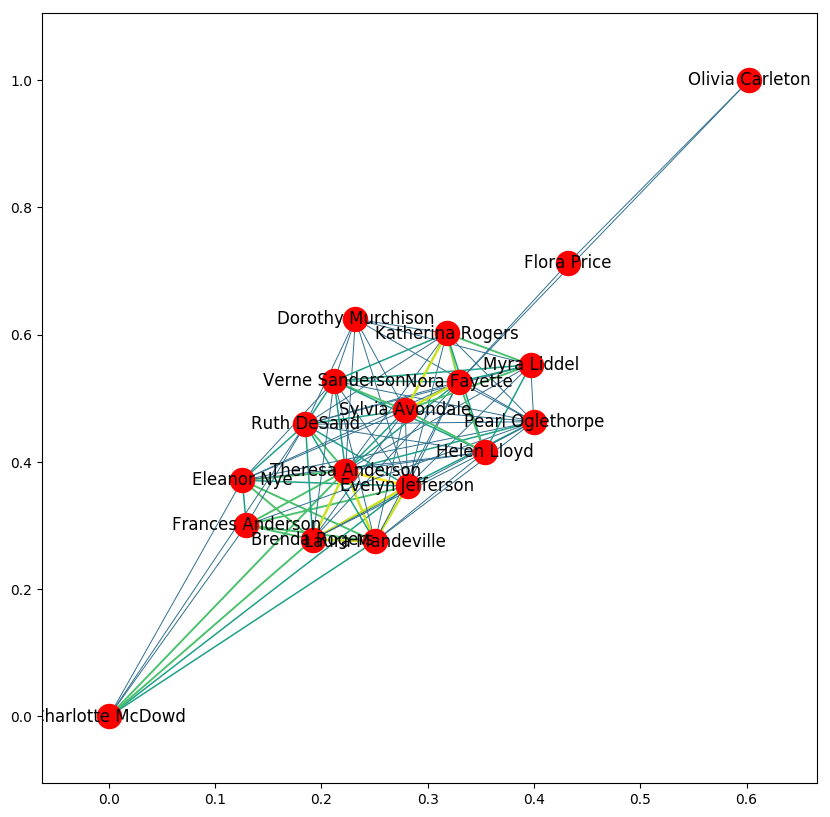

In [181]:
nx.draw_networkx(W, width=weights, edge_color=weights)

No thick red lines exist signify strong relationships; some yellow would indicate semi-string relationships

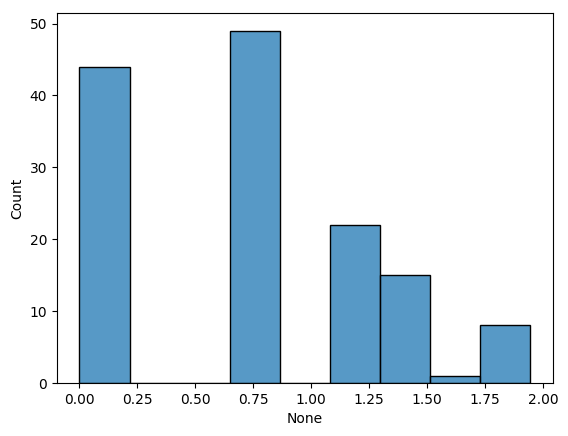

In [182]:
# Need to create histogram of the weights
plt.rcParams.update(plt.rcParamsDefault)
sns.histplot(data=weights);

So the histogram indicates most under 1.0, and a few to focus on above 1.5, so let's try that approach

In [183]:
# From book
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def trim_edges_inverse(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] < weight:
            g2.add_edge(f,to,edata)
    return g2

In [184]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(W, weight=math.exp(1.5))

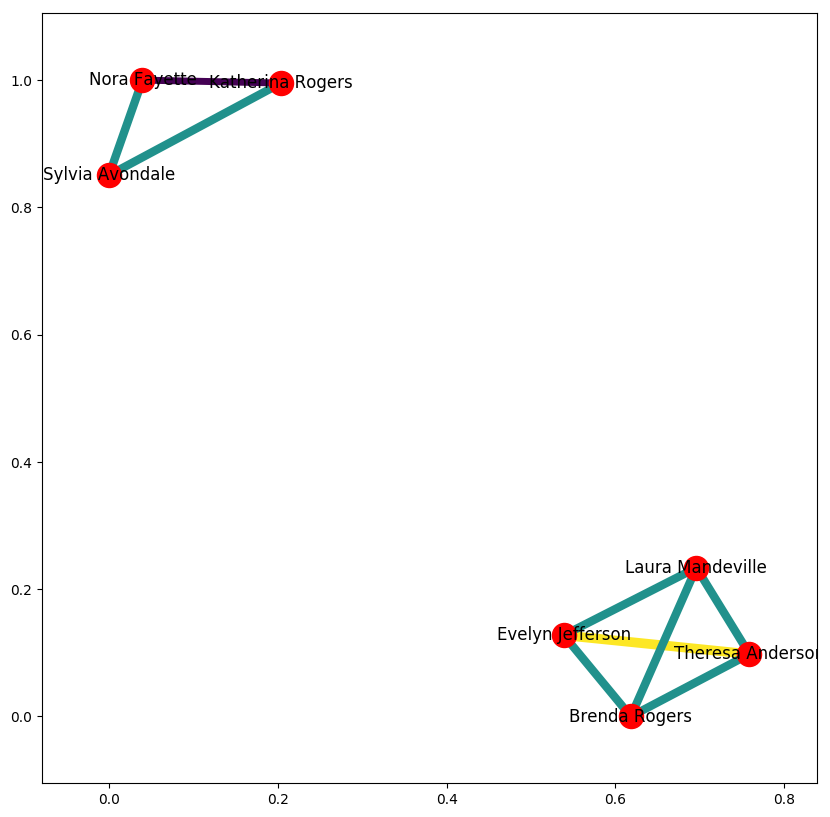

In [185]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Tightest groups (affiliation network of the women)

- Group 1 (Clique 2)
    - Nora F
    - Sylvia A
    - Katherine R
- Group 2 (Clique 1)
    - Laura M
    - Brenda R
    - Theresa A
    - Evelyn J

Indicates 11 people not included here

Lower the weight value, to broaden the affiliation networks

In [186]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(W, weight=math.exp(1.25))

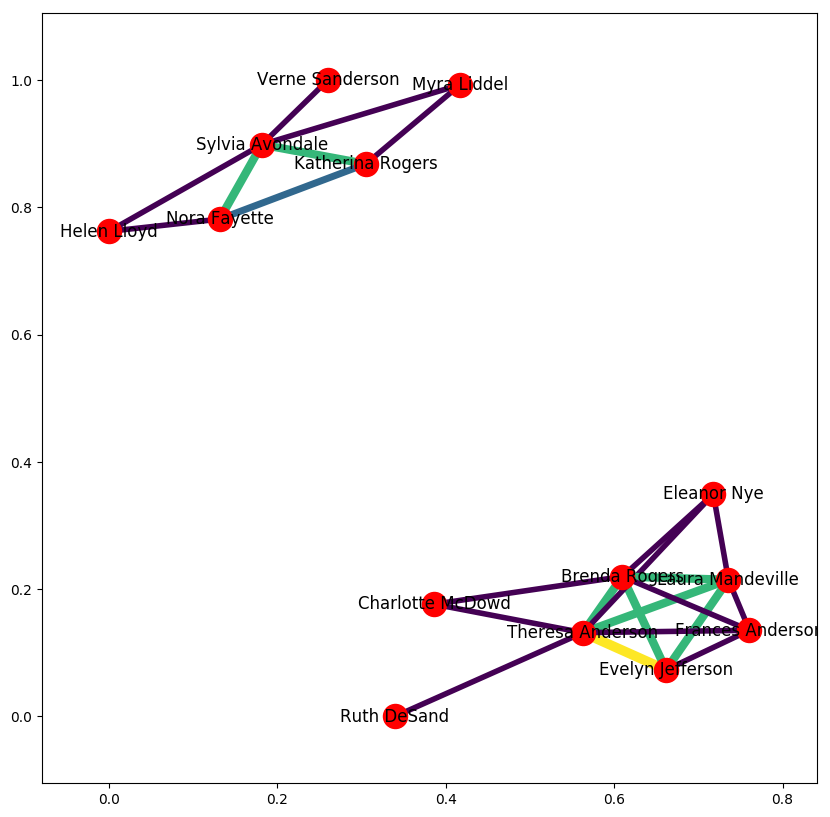

In [187]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Semi-tight groups

- Group 1 (6) (all part of Clique 2)
    - Nora F
    - Sylvia A
    - Katherine R
    - Myra L
    - Helen L
    - Verne S
- Group 2 (8)
    - Laura M
    - Brenda R
    - Theresa A
    - Evelyn J
    - Frances A
    - Eleanor N
    - Charlotte M
    - Ruth D (overlap in the book chart)
    
4 people not included here

Lower the weight criteria more in order to connect to the two islands and identify boundary spanners

In [188]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(W, weight=math.exp(1.09))

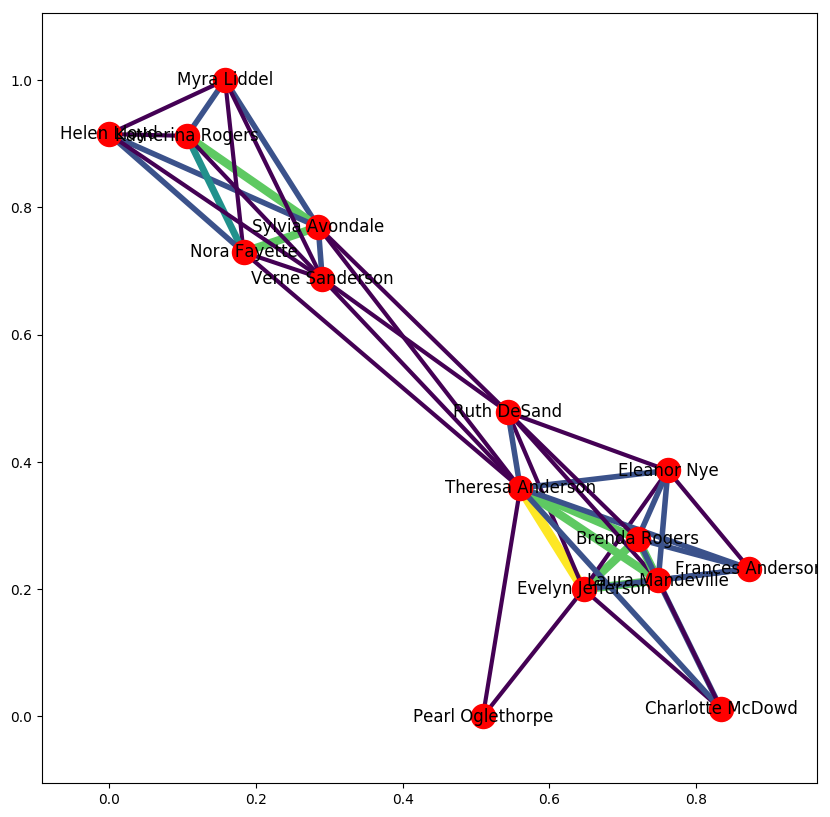

In [189]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Above graph connects the two islands and identifies possible boundary spanners

- Verne S
- Sylvia A (core clique 2)
- Ruth D
- Theresa A (core clique 1)
- Nora F ***

Trying to get all 18 on the graph, to see if there are truly two groups

In [190]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges_inverse(W, weight=math.exp(0.2))

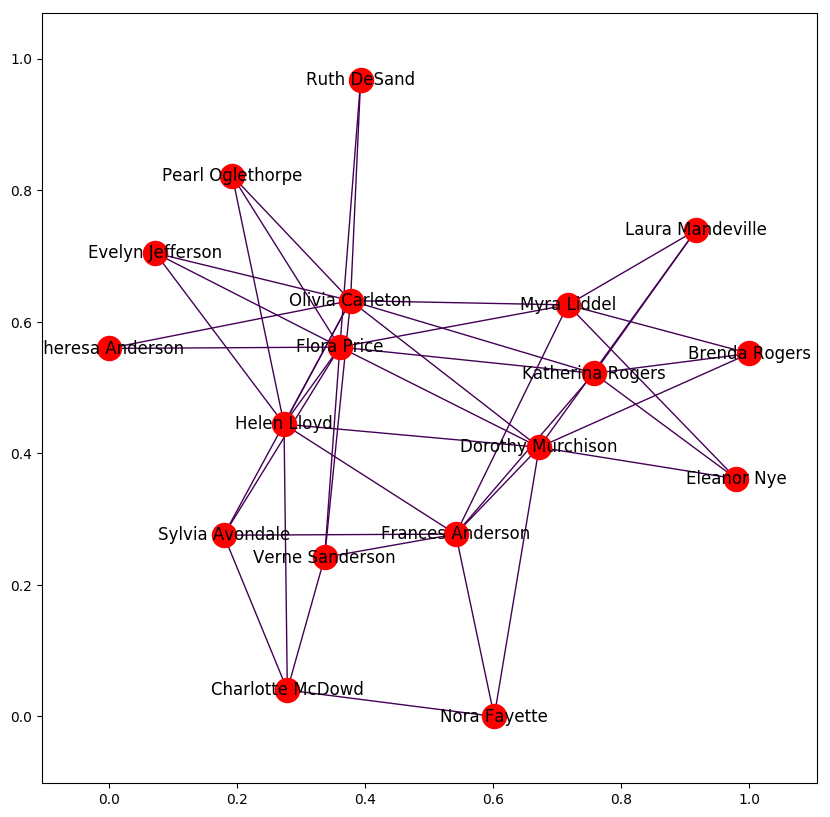

In [191]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Attempt weighted graph on the events ... doesn't amount to much

In [192]:
E = bi.weighted_projected_graph(G, events, ratio=False)

In [193]:
weights=[math.log(edata['weight']) for f,t,edata in E.edges(data=True)]

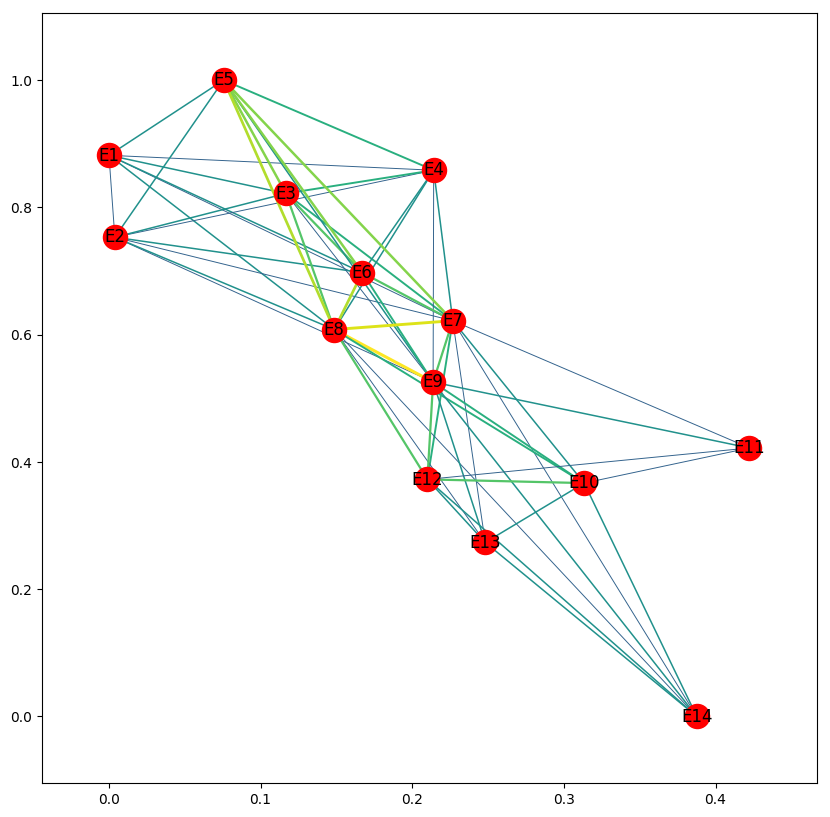

In [194]:
nx.draw_networkx(E, width=weights, edge_color=weights)

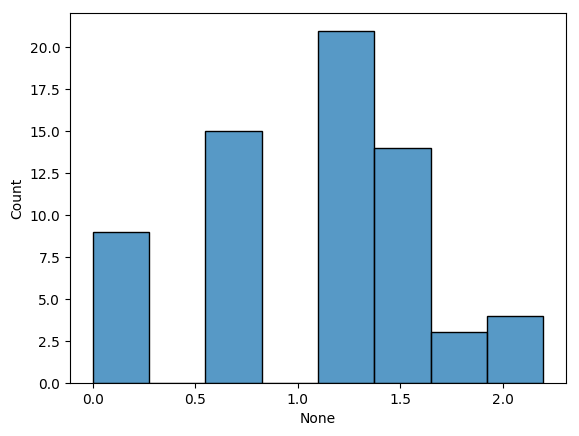

In [195]:
# Need to create histogram of the weights
plt.rcParams.update(plt.rcParamsDefault)
sns.histplot(data=weights);

In [196]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Enet_trim=trim_edges(E, weight=math.exp(1.75))

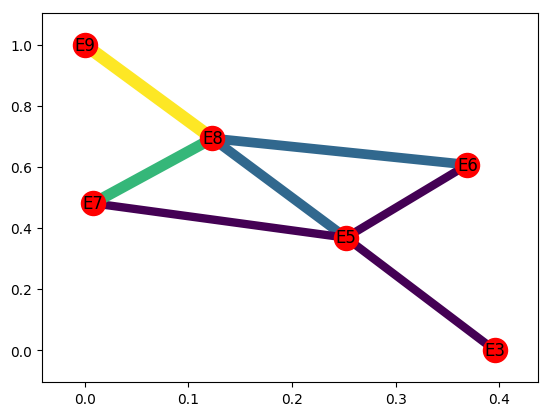

In [197]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Enet_trim.edges(data=True)]
plt.rcParams.update(plt.rcParamsDefault)
nx.draw_networkx(Enet_trim, width=weights, edge_color=weights)

Above shows the island of events (affiliation network of events)

## Centrality Measures

In [198]:
women_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 0]

women_nodes_deg_centrality = [node for node in nx.bipartite.degree_centrality(G, women_nodes).items() if len(node[0]) > 3]
event_nodes_deg_centrality = [node for node in nx.bipartite.degree_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(women_nodes_deg_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Theresa Anderson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('Sylvia Avondale', 0.5),
 ('Brenda Rogers', 0.5),
 ('Laura Mandeville', 0.5),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('Eleanor Nye', 0.2857142857142857),
 ('Frances Anderson', 0.2857142857142857)]

In [199]:
sorted(event_nodes_deg_centrality, key=lambda x: x[1], reverse=True)[:10]

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('E7', 0.5555555555555556),
 ('E5', 0.4444444444444444),
 ('E6', 0.4444444444444444),
 ('E12', 0.3333333333333333),
 ('E3', 0.3333333333333333),
 ('E10', 0.2777777777777778),
 ('E11', 0.2222222222222222),
 ('E4', 0.2222222222222222)]

In [200]:
women_nodes_close_centrality = [node for node in nx.bipartite.closeness_centrality(G, women_nodes).items() if len(node[0]) > 3]
event_nodes_close_centrality = [node for node in nx.bipartite.closeness_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(women_nodes_close_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Theresa Anderson', 0.8),
 ('Nora Fayette', 0.8),
 ('Evelyn Jefferson', 0.8),
 ('Sylvia Avondale', 0.7741935483870968),
 ('Brenda Rogers', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Katherina Rogers', 0.7272727272727273),
 ('Ruth DeSand', 0.7058823529411765),
 ('Verne Sanderson', 0.7058823529411765)]

In [201]:
sorted(event_nodes_close_centrality, key=lambda x: x[1], reverse=True)[:10]

[('E8', 0.8461538461538461),
 ('E9', 0.7857142857142857),
 ('E7', 0.7333333333333333),
 ('E6', 0.6875),
 ('E5', 0.5945945945945946),
 ('E12', 0.5641025641025641),
 ('E3', 0.5641025641025641),
 ('E10', 0.55),
 ('E11', 0.5365853658536586),
 ('E4', 0.5365853658536586)]

In [202]:
women_nodes_btwn_centrality = [node for node in nx.bipartite.betweenness_centrality(G, women_nodes).items() if len(node[0]) > 3]
event_nodes_btwn_centrality = [node for node in nx.bipartite.betweenness_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(women_nodes_btwn_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Nora Fayette', 0.11346136204298476),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944677),
 ('Sylvia Avondale', 0.07170914508501829),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.0494865998160072),
 ('Katherina Rogers', 0.047362754029819695),
 ('Helen Lloyd', 0.04238754006434827),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626)]

In [203]:
sorted(event_nodes_btwn_centrality, key=lambda x: x[1], reverse=True)[:5]

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204106),
 ('E7', 0.12950174424519842),
 ('E6', 0.06501635047516072),
 ('E5', 0.03769444252500667)]